<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-1" data-toc-modified-id="Chapter-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 1</a></span></li></ul></div>

## Chapter 1

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

In [20]:
T = nx.read_gpickle('ego-twitter.p')

In [33]:
len(T), type(T.nodes()), list(T.edges(data=True))[-1]

(23369,
 networkx.classes.reportviews.NodeView,
 (23324, 23336, {'date': datetime.date(2010, 9, 20)}))

In [29]:
T_sub = T.subgraph(list(T.nodes())[:48])

/Users/Brian/anaconda3/envs/datacamp_intro_to_networks/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/Brian/anaconda3/envs/datacamp_intro_to_networks/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


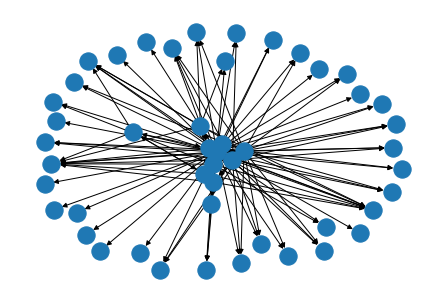

In [30]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Draw the graph to screen
nx.draw(T_sub)
plt.show()


In [44]:
from datetime import date

# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010, 1, 1)]


In [45]:
eoi

[(1, 5),
 (1, 9),
 (1, 13),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 24),
 (1, 27),
 (1, 28),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 34),
 (1, 38),
 (1, 39),
 (1, 41),
 (1, 45),
 (1, 49),
 (16, 5384),
 (16, 7881),
 (16, 7358),
 (16, 36),
 (18, 16),
 (18, 24),
 (18, 35),
 (18, 1326),
 (19, 12035),
 (19, 15),
 (19, 17),
 (19, 20),
 (19, 21),
 (19, 5426),
 (19, 12037),
 (19, 36),
 (19, 37),
 (19, 5485),
 (28, 8),
 (28, 8830),
 (28, 15427),
 (28, 5424),
 (28, 5426),
 (28, 27),
 (28, 30),
 (28, 31),
 (28, 5444),
 (28, 44),
 (28, 15429),
 (28, 48),
 (34, 17050),
 (34, 15192),
 (34, 15195),
 (34, 17063),
 (34, 17064),
 (34, 17067),
 (34, 17069),
 (34, 17070),
 (34, 17072),
 (34, 17074),
 (34, 17076),
 (34, 17077),
 (34, 17078),
 (34, 17080),
 (34, 17082),
 (34, 17084),
 (34, 17087),
 (34, 17089),
 (34, 17090),
 (34, 17092),
 (34, 17095),
 (36, 18570),
 (36, 1307),
 (36, 24),
 (36, 35),
 (36, 4452),
 (36, 12613),
 (36, 1325),
 (37, 24),
 (37, 4434),
 (39, 1),
 (39, 24),
 (39, 35),
 (

In [46]:
# Set the weight of the edge
weight = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:

        # Set the weight to 1.1
        T.edges[u, v]['weight'] = 1.1

In [48]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges():

    # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))

In [49]:
T.number_of_selfloops()

42

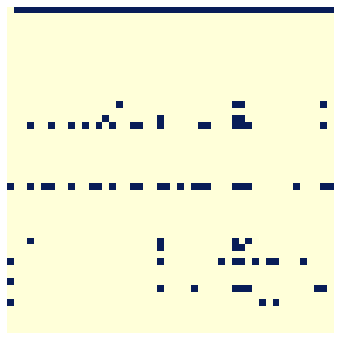

In [51]:
# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(T_sub)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()

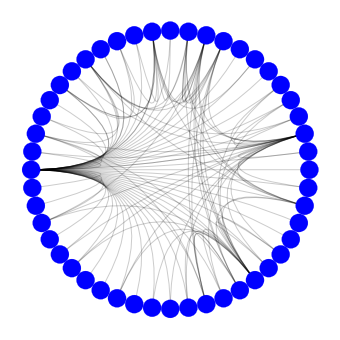

In [53]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(T_sub)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()


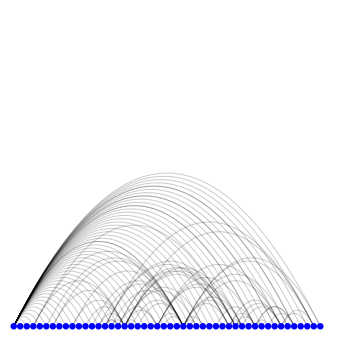

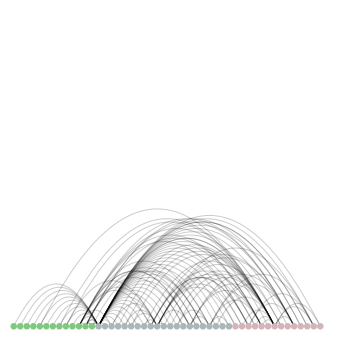

In [54]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(T_sub)

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

# Create the customized ArcPlot object: a2
a2 = ArcPlot(T_sub, node_order='category', node_color='category')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show()
